In [185]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from numpy import linalg
import pandas as pd
from sklearn.datasets import load_digits
#import zoopt


In [186]:
#from scipy import optimize
import blackbox as bb

In [187]:
plotting_on = 0
cluster_size = 2
noise_threshold = 10.0
S = 1

In [188]:
def plot_clusters(X, labels):
    chosen_pts_cluster_label = []
    for idx, label in enumerate(labels):
        if label == 0:
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'blue')

        if label == 1:
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'red')

        if mask[idx] == 1:
            chosen_pts_cluster_label.append(label)
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'green')

    if plotting_on:
        plt.show()
    return chosen_pts_cluster_label

def get_Y(labels,n_samples, n_clusters):
    Y = np.zeros([n_samples, n_clusters])
    for idx, label in enumerate(labels):
        Y[idx, label] = 1
    return Y

def run_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    
    temp = np.copy(labels)
    temp_c = np.copy(centers)
    if np.sum(centers[0,:]) > np.sum(centers[1,:]):
        return (labels, centers) 
    else:
        labels[temp == 0] = 1
        labels[temp == 1] = 0
        centers[1,:] = temp_c[0,:]
        centers[0,:] = temp_c[1,:]
        return (labels, centers)
    
def run_ward(n_clusters, X):
    ward = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward')
    labels = ward.fit_predict(X)
    #centers = ward.cluster_centers_
    X_temp = np.copy(X)
    center0 = np.zeros((n_features))
    center1 = np.zeros((n_features))
    n_samples0 = 0
    n_samples1 = 0
    for x,l in zip(X_temp, labels):
        if l == 0:
            center0 += x
            n_samples0 += 1.0
        if l == 1:
            center1 += x
            n_samples1 += 1.0

    center0 = center0/float(n_samples0)
    center1 = center1/float(n_samples1)

    centers = np.zeros((2,n_features))
    centers[0,:] = center0
    centers[1,:] = center1
            
    temp = np.copy(labels)
    temp_c = np.copy(centers)
    if np.sum(centers[0,:]) > np.sum(centers[1,:]):
        return (labels, centers) 
    else:
        labels[temp == 0] = 1
        labels[temp == 1] = 0
        centers[1,:] = temp_c[0,:]
        centers[0,:] = temp_c[1,:]
        return (labels, centers)

    
def add_noise(X,noise):
    for i,(m,_) in enumerate(zip(mask,X)):
        if m != 0:
            X[i,:] = X[i,:] + noise
    return X

def get_dist(Y,Y_dash):
    dist = linalg.norm(np.matmul(Y,Y.T) - np.matmul(Y_dash,Y_dash.T))
    return dist


In [189]:
digits = load_digits()
data = digits.data
y = digits.target
X1 = data[y == 9, :]
X2 = data[y == 8,:]
X = np.vstack((X1,X2))

sample_size = X.shape[0]
mask = np.zeros((sample_size))
n_features = X.shape[1]

X_org = np.copy(X).astype(np.float64)

##kmeans_d = KMeans(n_clusters = cluster_size, random_state=42)
##labels_d = kmeans_d.fit_predict(X)    
##centers_d = kmeans_d.cluster_centers_

ward_d = AgglomerativeClustering(n_clusters = cluster_size, linkage='ward')
labels_d = ward_d.fit_predict(X)    
X_temp_d = np.copy(X)
center0_d = np.zeros((n_features))
center1_d = np.zeros((n_features))
n_samples0_d = 0
n_samples1_d = 0
for x,l in zip(X_temp_d, labels_d):
    if l == 0:
        center0_d += x
        n_samples0_d += 1.0
    if l == 1:
        center1_d += x
        n_samples1_d += 1.0
center0_d = center0_d/float(n_samples0_d)
center1_d = center1_d/float(n_samples1_d)
centers_d = np.zeros((2,n_features))
centers_d[0,:] = center0_d
centers_d[1,:] = center1_d

temp_d = np.copy(labels_d)
temp_c_d = np.copy(centers_d)
if np.sum(centers_d[0,:]) < np.sum(centers_d[1,:]):
    labels_d[temp_d == 0] = 1
    labels_d[temp_d == 1] = 0
    centers_d[1,:] = temp_c_d[0,:]
    centers_d[0,:] = temp_c_d[1,:]


best_vals = []
for idx,label in enumerate(labels_d):
    if label == 0:
        best_vals.append(linalg.norm(X[idx,:] - centers_d[1,:]))
    else:
        best_vals.append(1000000)

best_vals = np.array(best_vals)
best_vals_idx = np.argsort(best_vals)

count = 0
mask_idx = -1
for idx in range(0,sample_size):
    if idx in best_vals_idx[:S]:
        mask[idx] = 1
        count+=1
        mask_idx = idx


(190, 164)
[[0, 0], [0, 0.22865853658536583], [0, 2.817073170731707], [-0.12804878048780566, 0], [-2.036585365853659, 0], [0, 0.6585365853658542], [0, 2.277439024390244], [0, 0.20121951219512196], [0, 0], [-0.6219512195121952, 0], [-2.487804878048781, 0], [0, 2.277439024390243], [0, 0.6493902439024399], [-3.8170731707317067, 0], [0, 0.621951219512195], [0, 0.20121951219512196], [0, 0], [0, 0.5304878048780486], [-1.6585365853658534, 0], [0, 5.634146341463414], [0, 9.759146341463413], [-0.8414634146341466, 0], [0, 0.20121951219512213], [0, 0.07317073170731708], [0, 0], [0, 2.6341463414634148], [0, 0.06402439024390283], [-3.975609756097562, 0], [-2.8719512195121943, 0], [0, 11.341463414634145], [0, 6.164634146341463], [0, 0], [0, 0], [0, 0.27439024390243905], [0, 4.5], [-2.036585365853658, 0], [-8.658536585365853, 0], [-2.7317073170731714, 0], [0, 3.448170731707317], [0, 0], [0, 0], [0, 0.23780487804878048], [-1.5182926829268293, 0], [-10.774390243902438, 0], [0, 0.6402439024390243], [-1.

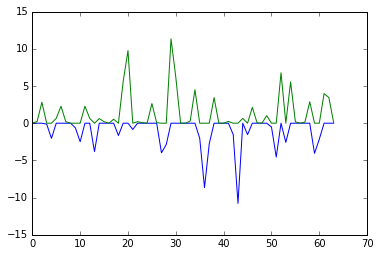

In [190]:
mean_0, mean_1  = np.zeros([64]), np.zeros([64])
for i,l in enumerate(labels_d):
    if l == 0:
        mean_0 += X_org[i]
    if l == 1:
        mean_1 += X_org[i]
mean_0, mean_1 = mean_0/np.sum(1-labels_d), mean_1/np.sum(labels_d)
print(np.sum(1-labels_d), np.sum(labels_d))

#plt.plot(mean_0-mean_1)
#plt.plot(mean_1)
#plt.show()

#delta = mean_1 - mean_0
delta = centers_d[1,:] - X_org[mask_idx]
Delta = []
for i,d in enumerate(delta):
    if d > 0:
        Delta.append([0,d*1.5])
    elif d < 0:
        Delta.append([d*1.0, 0])
    elif d == 0:
        Delta.append([0,0])
    else:
        Delta.append([0,0])
print(Delta)
plt.plot(Delta)
plt.show()

In [191]:
def f(x):
    success = 0.0
    noise = np.array(x)
    (labels, centers) = run_ward(cluster_size, X_org)
    org_label = labels[mask_idx]
    Y = get_Y(labels, sample_size, cluster_size)
    X_noisy = np.copy(X_org)
    X_noisy  = add_noise(X_noisy, noise)
    (labels_dash, centers_dash) = run_ward(cluster_size, X_noisy)
    noisy_label = labels_dash[mask_idx]
    Y_dash = get_Y(labels_dash, sample_size, cluster_size)  
    dist = get_dist(Y,Y_dash)
    #if noisy_label != org_label and dist != 0.0:
    #    return -10000.0 - dist
    #else:
    #    return 1000000.0
    #    success = 1.0
    #return (linalg.norm(noise)-(dist + 10000*success))
    if dist != 0.0:
        #return -dist + linalg.norm(noise)
        return -dist
    else:
        return 1000000.0

In [178]:
bb.search(f=f,  # given function
          box=Delta,  # range of values for each parameter (2D case)
          n=40,  # number of function calls on initial stage (global search)
          m=40,  # number of function calls on subsequent stage (local search)
          batch=4,  # number of calls that will be evaluated in parallel
          resfile='output_new.csv')  # text file where results will be saved

In [192]:
#best_noise = [+0.0000e+00, +8.9602e-03, +5.4368e-01, +1.5522e-01, -9.6872e-01, -7.4759e-01, +4.3872e-01, +6.7226e-02, -1.7142e-02, +1.5043e-01, +2.5315e-02, -1.2638e+00, +5.7253e-01, -4.1198e-01, -1.9617e-01, +5.5057e-02, -3.8614e-03, +3.1105e-02, +2.0687e-01, -1.1013e+00, +2.5436e-01, +8.0457e-01, +2.7950e-01, +1.5960e-02, +0.0000e+00, +1.0464e-01, +3.0108e-01, -1.0442e+00, -2.2967e-01, +1.9879e+00, +9.2347e-01, +0.0000e+00, +0.0000e+00, -1.9714e-01, -3.2120e+00, -7.6698e+00, -7.8055e+00, +1.5502e+00, +9.8335e-01, +0.0000e+00, +0.0000e+00, -8.6399e-01, -8.9785e+00, -7.6757e+00, -7.8249e+00, +3.2925e-01, +6.5071e-01, +2.8390e-03, +0.0000e+00, -2.8925e-01, -3.7843e+00, -3.8917e+00, -2.9830e+00, +1.8404e-01, +2.3047e-01, +6.6956e-03, +0.0000e+00, -3.6066e-02, +3.7281e-02, -8.2584e-01, +3.3176e-02, +5.5346e-02, +1.1627e-02, +1.6265e-04]
best_noise = [ +0.0000e+00, +1.0947e-01, +1.3192e+00, -6.9412e-02, -1.1248e+00, +2.8815e-01, +9.7368e-01, +8.4033e-02, +0.0000e+00, -3.7435e-01, -1.5213e+00, +8.6317e-01, +2.4002e-01, -2.4417e+00, +2.1838e-01, +6.8822e-02, +0.0000e+00, +1.7194e-01, -1.1356e+00, +1.7274e+00, +2.9080e+00, -5.9791e-01, +5.6544e-02, +1.9950e-02, +0.0000e+00, +6.7494e-01, +1.5887e-02, -3.0209e+00, -2.2050e+00, +2.5451e+00, +1.3357e+00, +0.0000e+00, +0.0000e+00, +5.3212e-02, +8.3930e-01, -1.6717e+00, -7.1700e+00, -2.2817e+00, +5.4352e-01, +0.0000e+00, +0.0000e+00, +3.2522e-02, -1.3210e+00, -9.4468e+00, +7.4626e-02, -1.3676e+00, +2.2046e-01, +3.5487e-03, +0.0000e+00, +8.4818e-02, -4.6097e-01, -4.2218e+00, +4.4573e-01, -2.4252e+00, +2.9784e-01, +8.7469e-03, +0.0000e+00, +5.2928e-03, +8.7691e-02, -3.9485e+00, -2.1052e+00, +5.4142e-02, +2.7992e-02, +2.4573e-04]
np.save('wip2_X_org.npy', X_org)
np.savetxt('X_org.csv', X_org, delimiter=',')
X_adv = np.copy(X_org)
X_adv = add_noise(X_adv, best_noise)
np.save('wip2_X_adv.npy', X_adv)
np.savetxt('X_adv.csv', X_adv, delimiter=',')
print(mask_idx)

319


In [193]:
Xo = np.load('wip2_X_org.npy')
Xa = np.load('wip2_X_adv.npy')

lo,_ = run_ward(2, Xo)
la,_ = run_ward(2, Xa)

In [194]:
print(lo,la)
np.savetxt('lo.csv', lo, delimiter =',')
np.savetxt('la.csv', la, delimiter =',')

(array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [195]:
print(lo[lo == 0].shape, lo[lo == 1].shape)
print(lo[mask_idx],la[mask_idx])

((190,), (164,))
(0, 1)


In [196]:
count_diffs = 0
perturbed_idx = []
for idx,(el1, el2) in enumerate(zip(lo,la)):
    if el1 != el2:
        count_diffs += 1
        perturbed_idx.append(idx)
print(count_diffs)

21


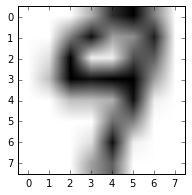

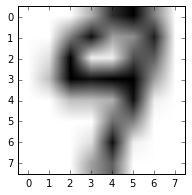

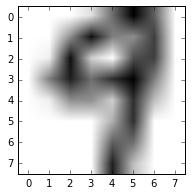

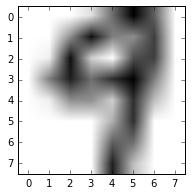

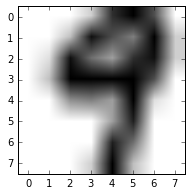

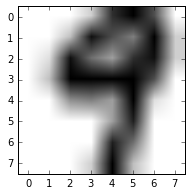

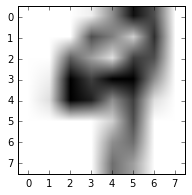

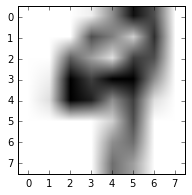

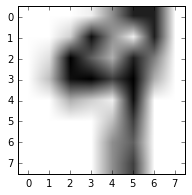

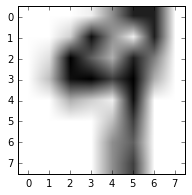

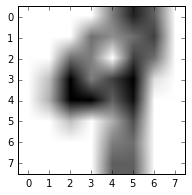

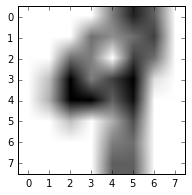

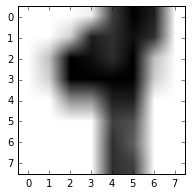

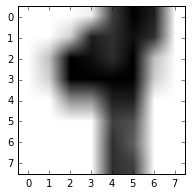

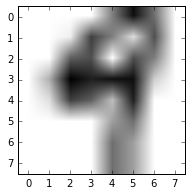

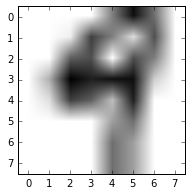

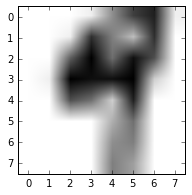

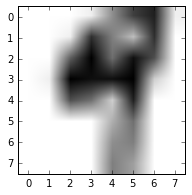

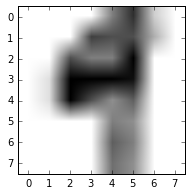

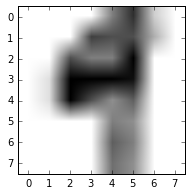

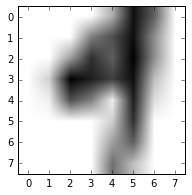

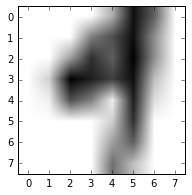

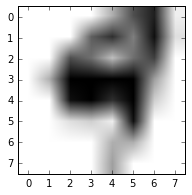

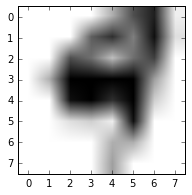

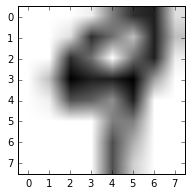

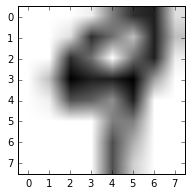

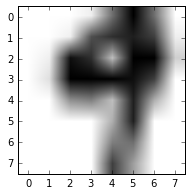

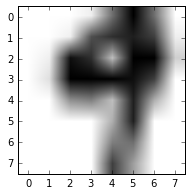

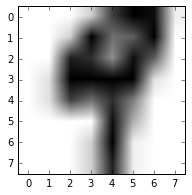

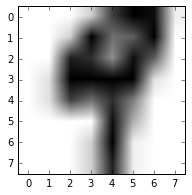

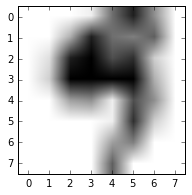

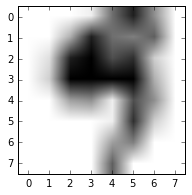

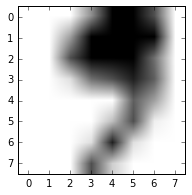

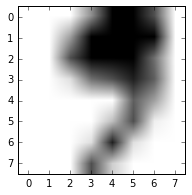

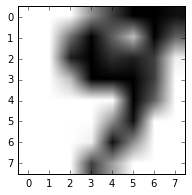

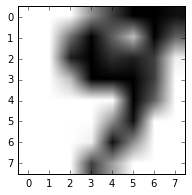

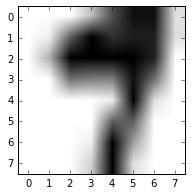

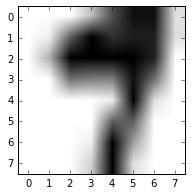

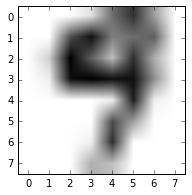

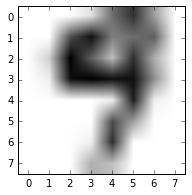

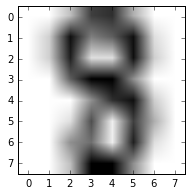

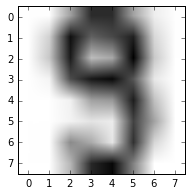

In [197]:
for idx, (org,noisy) in enumerate(zip(Xo, Xa)):
    if idx in perturbed_idx or idx == mask_idx:
        #if idx == mask_idx
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(org,(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(noisy,(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##

In [127]:
for i in perturbed_idx:
    print(lo[i], la[i], y[i])

(1, 0, 5)
(1, 0, 0)
(1, 0, 4)
(1, 0, 6)
(1, 0, 6)
(1, 0, 6)
(1, 0, 4)
(1, 0, 9)
(1, 0, 1)
(1, 0, 5)
(1, 0, 0)
(1, 0, 9)
(1, 0, 5)
(1, 0, 2)
(1, 0, 8)
(1, 0, 4)
(1, 0, 5)
(1, 0, 6)
(1, 0, 7)
(1, 0, 0)


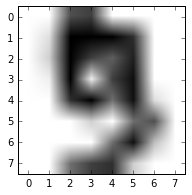

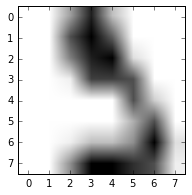

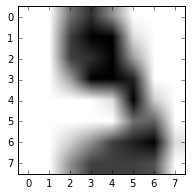

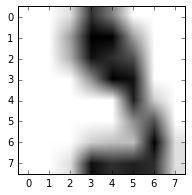

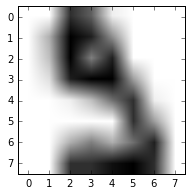

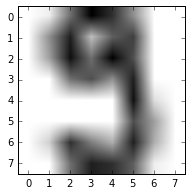

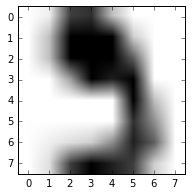

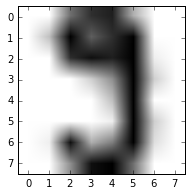

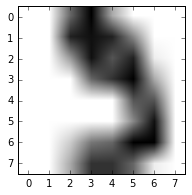

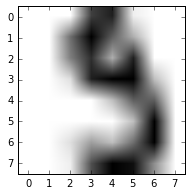

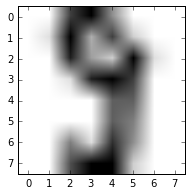

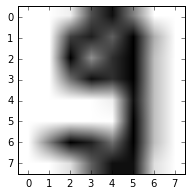

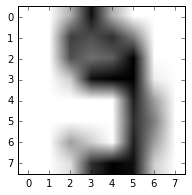

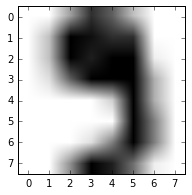

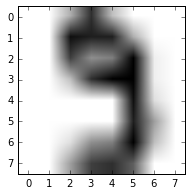

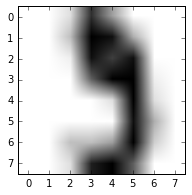

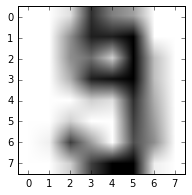

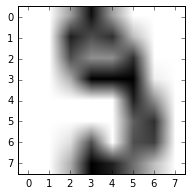

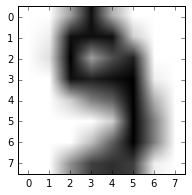

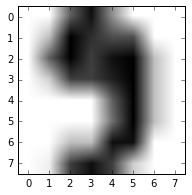

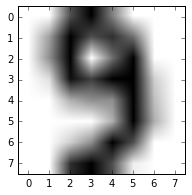

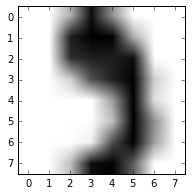

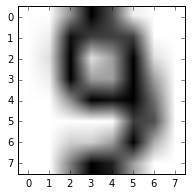

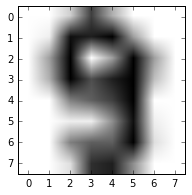

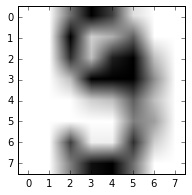

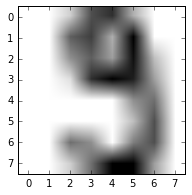

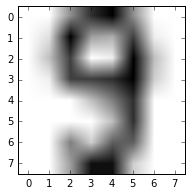

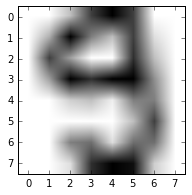

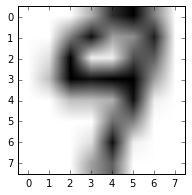

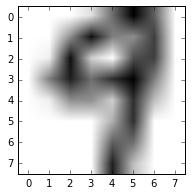

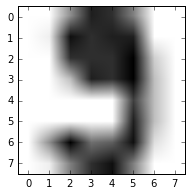

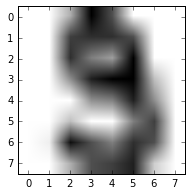

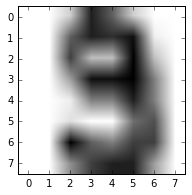

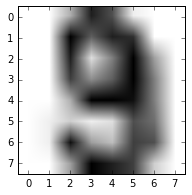

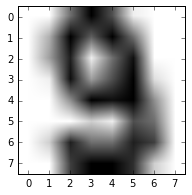

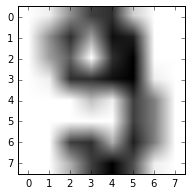

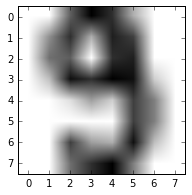

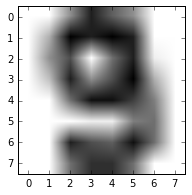

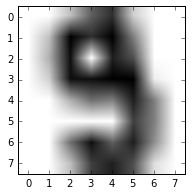

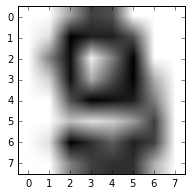

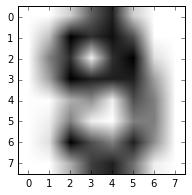

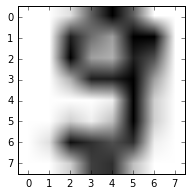

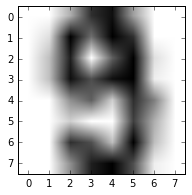

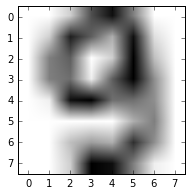

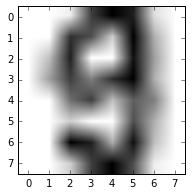

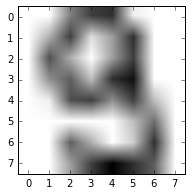

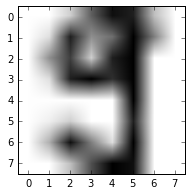

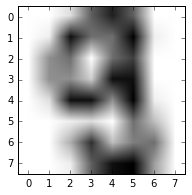

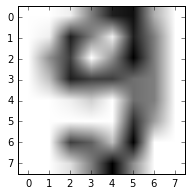

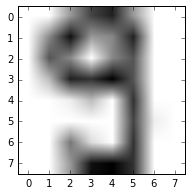

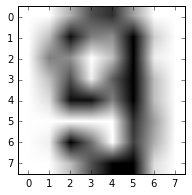

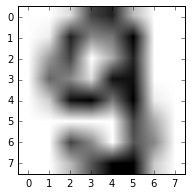

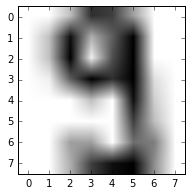

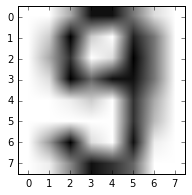

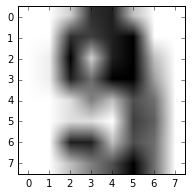

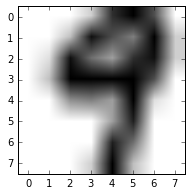

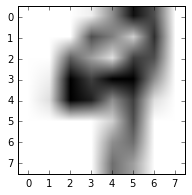

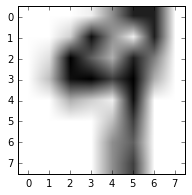

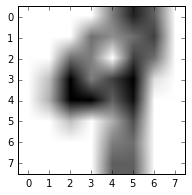

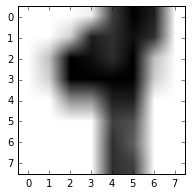

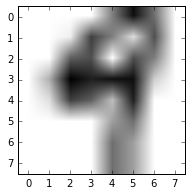

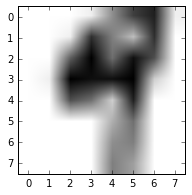

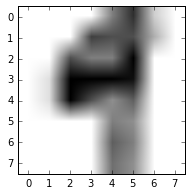

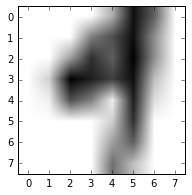

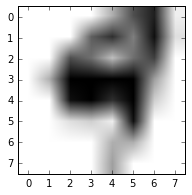

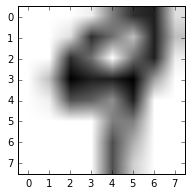

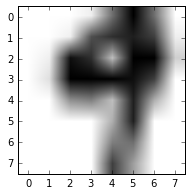

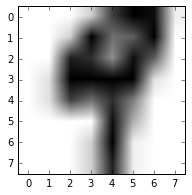

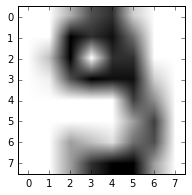

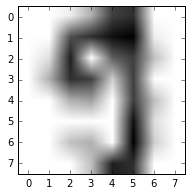

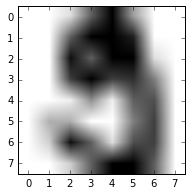

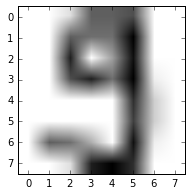

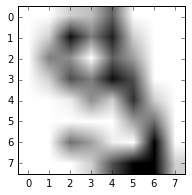

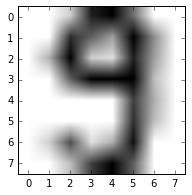

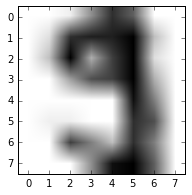

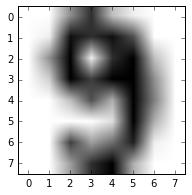

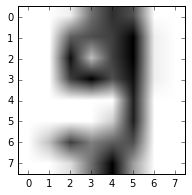

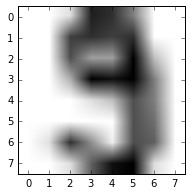

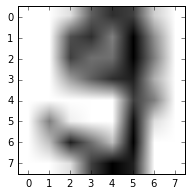

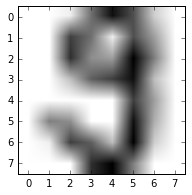

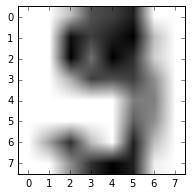

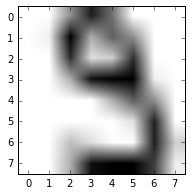

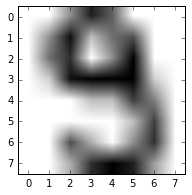

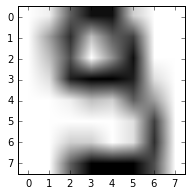

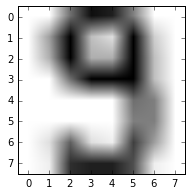

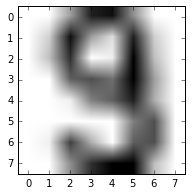

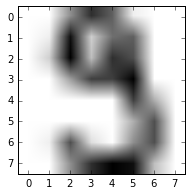

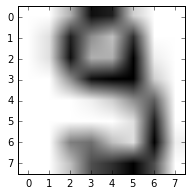

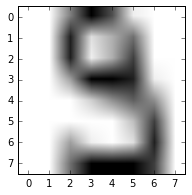

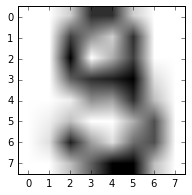

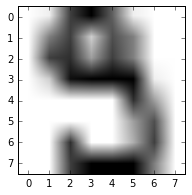

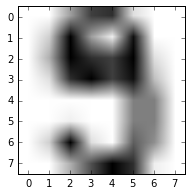

KeyboardInterrupt: 

In [129]:
for i,l in enumerate(lo):
    if l == 1:
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(Xo[i,:],(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##

In [130]:
print(y[y==9].shape)
print(y[y==8].shape)

(180,)
(174,)
